# GTZAN - ML Ensembles (RF/AdaBoost/GBM/XGB/CatBoost)

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres:-
- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock

We will be applying following Ensemble Algorithms:-

- Random Forest (RF)
- AdaBoost
- Gradient Boosting Machine (GBM)
- Extreme Gradient Boosting (XGB)
- CatBoost

# Reading & Understanding Data
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske
import eli5
from eli5.sklearn import PermutationImportance
from pprint import pprint
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

## Loading Dataset

In [2]:
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [5]:
# Calculate basic statistics for numerical features
statistics = df.describe()
statistics

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


## About dataset

In [6]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


# Data Visualization

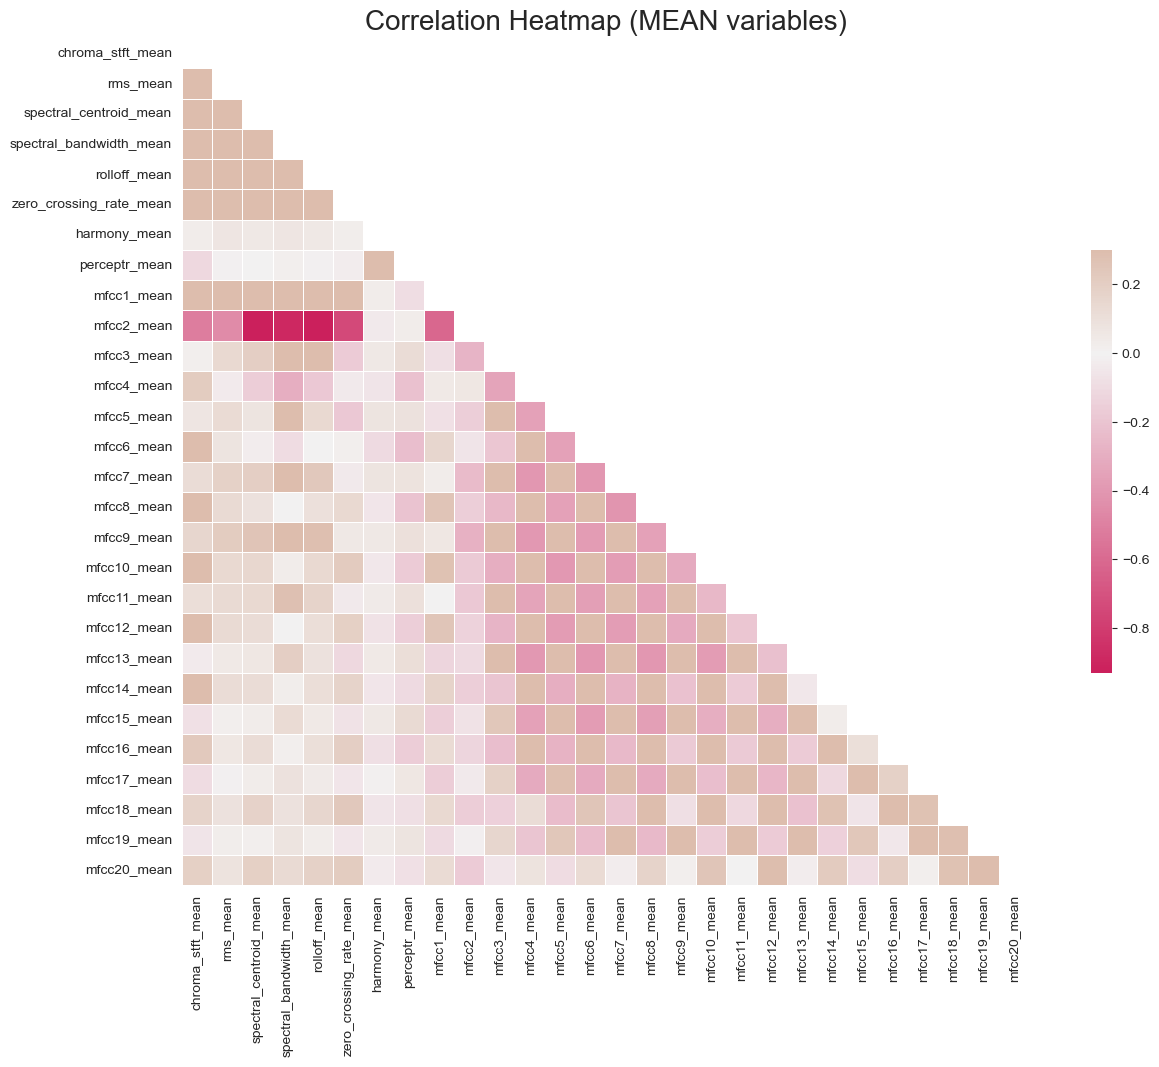

In [7]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

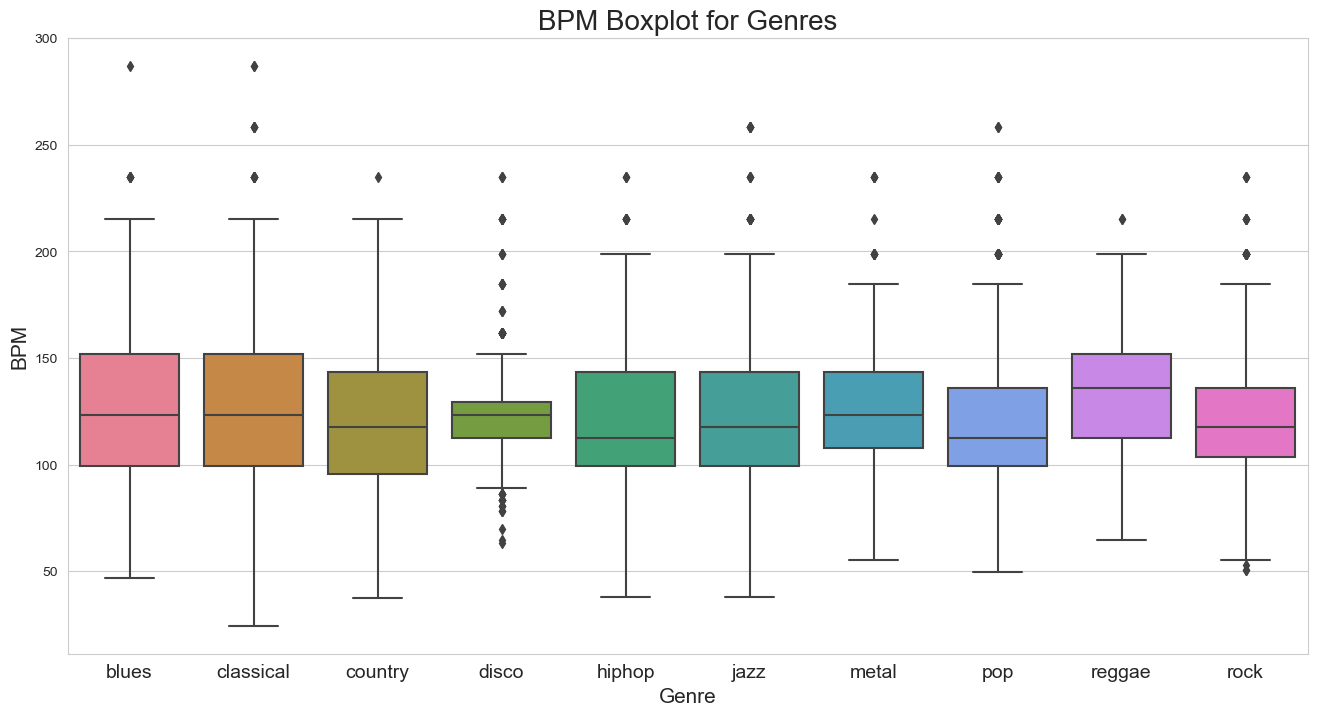

In [8]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

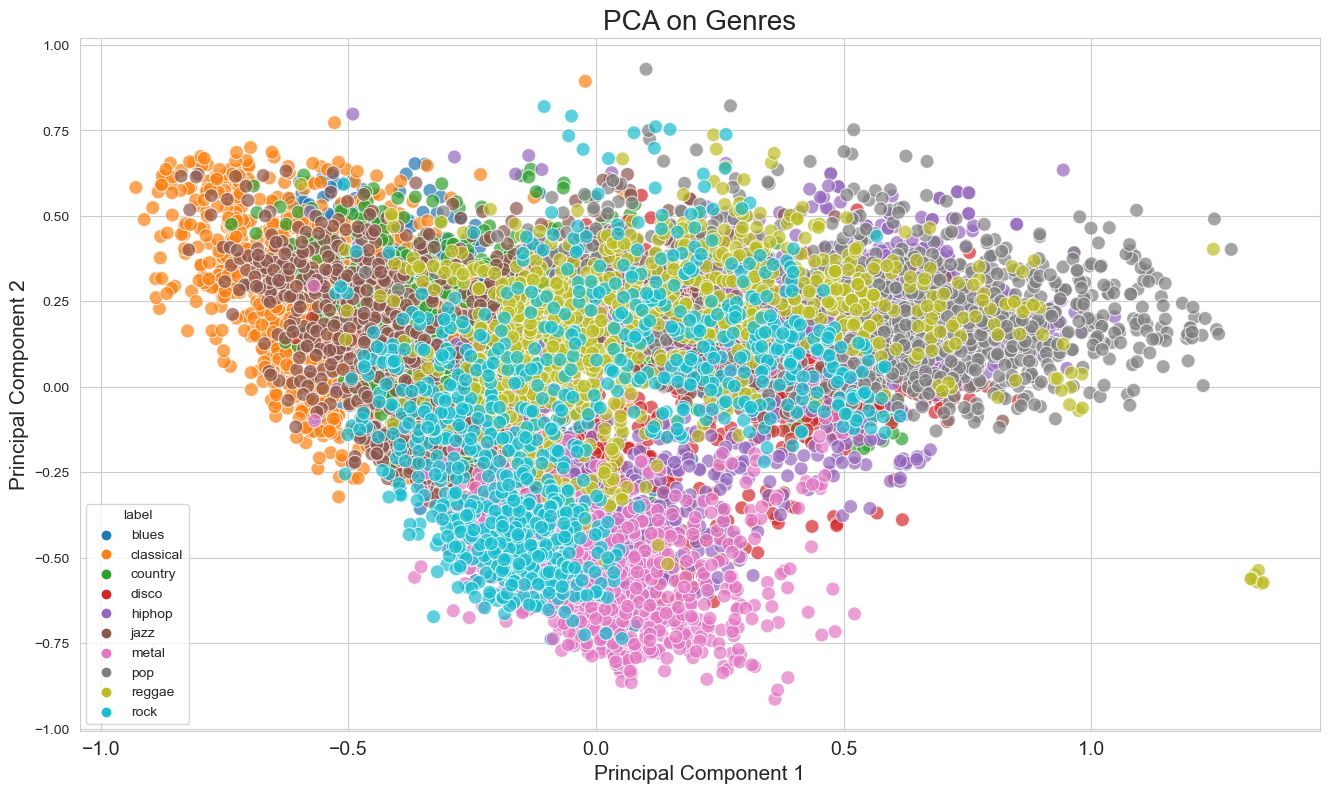

In [9]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [10]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [11]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [12]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

In [13]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,9
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,9
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,9
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,9


In [14]:
# from sklearn.preprocessing import LabelEncoder
# # Create a LabelEncoder object
# encoder = LabelEncoder()

# # Fit the encoder to the column and transform the values
# df['label'] = encoder.fit_transform(df['label'])+1

# # Print the encoded column
# print(df['label'])

In [15]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# encoder = LabelEncoder()

# # Fit the encoder to the column and transform the values
# encoded_values = encoder.fit_transform(df['label'])

# # Map the encoded values to the original labels
# encoded_to_label = {encoded_value: label for encoded_value, label in zip(encoded_values, df['label'])}

# # Find the label corresponding to 0
# label_for_0 = encoded_to_label[0]

# # Find the labels corresponding to integers 1, 2, 3, ...
# labels_for_integers = [encoded_to_label[i] for i in range(1, len(encoder.classes_))]

# # Print the results
# print("Label for 0: ", label_for_0)
# print("Labels for integers 1, 2, 3, ...: ", labels_for_integers)


# Split Train Dev & Test Sets

In [16]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [17]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [18]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [19]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


## Scale the Features

In [20]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Feature Selection

## Sample Logistic Regression Model

Building model with all the available features.

In [21]:
def predictProba(clf, X, dev=False):
    y_true = y_train
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    unique_labels = np.unique(np.concatenate((y_true, y_pred_X)))
    fig, ax = plt.subplots(figsize=(6, 6))
    skm.plot_confusion_matrix(clf, X, y_true, display_labels=unique_labels, cmap=plt.cm.Blues, xticks_rotation=90, ax=ax)
    plt.show()
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

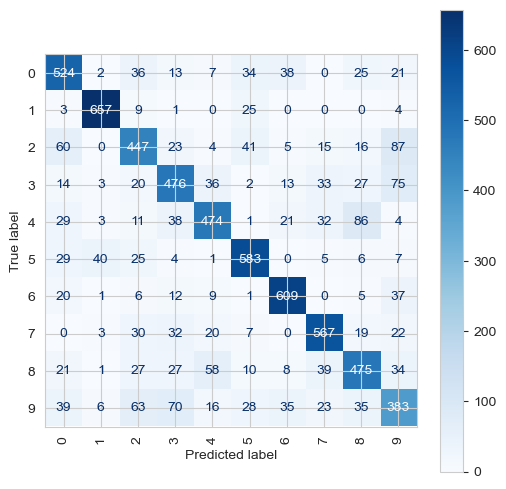

              precision    recall  f1-score   support

           0      0.709     0.749     0.728       700
           1      0.918     0.940     0.929       699
           2      0.663     0.640     0.652       698
           3      0.684     0.681     0.682       699
           4      0.758     0.678     0.716       699
           5      0.796     0.833     0.814       700
           6      0.835     0.870     0.852       700
           7      0.794     0.810     0.802       700
           8      0.684     0.679     0.681       700
           9      0.568     0.549     0.558       698

    accuracy                          0.743      6993
   macro avg      0.741     0.743     0.742      6993
weighted avg      0.741     0.743     0.742      6993



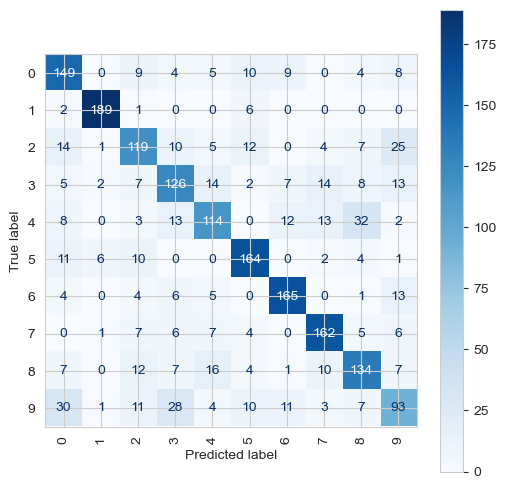

              precision    recall  f1-score   support

           0      0.648     0.753     0.696       198
           1      0.945     0.955     0.950       198
           2      0.650     0.604     0.626       197
           3      0.630     0.636     0.633       198
           4      0.671     0.579     0.621       197
           5      0.774     0.828     0.800       198
           6      0.805     0.833     0.819       198
           7      0.779     0.818     0.798       198
           8      0.663     0.677     0.670       198
           9      0.554     0.470     0.508       198

    accuracy                          0.715      1978
   macro avg      0.712     0.715     0.712      1978
weighted avg      0.712     0.715     0.712      1978



In [22]:
lr = LogisticRegression(random_state=seed)
lr.fit(X_train, y_train)
predictProba(lr, X_train)
predictProba(lr, X_train, dev=True)

## Permutation Importance Feature Selection

In [23]:
perm = PermutationImportance(lr, random_state=seed).fit(X_train, y_train, n_iter=10)
print("Feature Importances using Permutation Importance")
eli5.show_weights(perm, feature_names = X_dev.columns.tolist())

Feature Importances using Permutation Importance


Weight,Feature
0.1856 ± 0.0067,mfcc1_mean
0.1751 ± 0.0134,spectral_centroid_mean
0.1610 ± 0.0034,rms_mean
0.1532 ± 0.0070,spectral_bandwidth_mean
0.1409 ± 0.0118,rolloff_mean
0.1294 ± 0.0072,zero_crossing_rate_mean
0.0982 ± 0.0028,perceptr_var
0.0952 ± 0.0031,mfcc3_mean
0.0905 ± 0.0050,chroma_stft_mean
0.0847 ± 0.0040,mfcc2_mean


#### Plot Permutation Importances

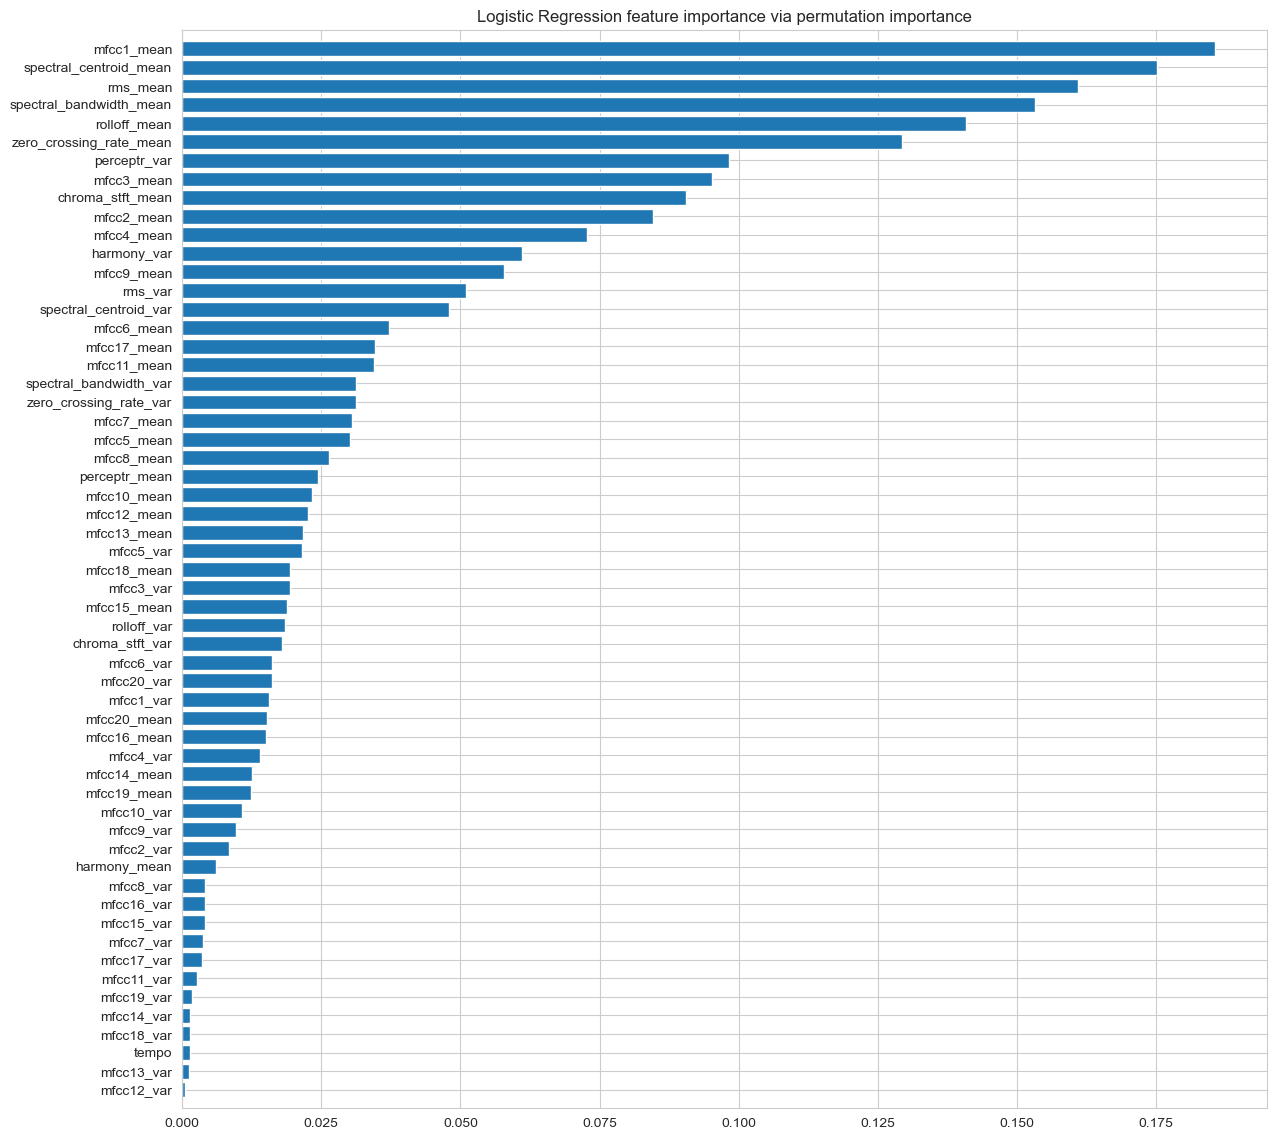

In [24]:
# plot the permutation importances
perm_indices = np.argsort(perm.feature_importances_)[::-1]
perm_features = [X_dev.columns.tolist()[xx] for xx in perm_indices]
plt.figure(figsize=(14, 14))
plt.title("Logistic Regression feature importance via permutation importance")
plt.barh(range(X_dev.shape[1]), perm.feature_importances_[perm_indices])
plt.yticks(range(X_dev.shape[1]), perm_features)
plt.ylim([X_dev.shape[1], -1])
plt.show()

#### Model Score using Permutation Importances

In [25]:
# lr = LogisticRegression(random_state=seed)
# lr.fit(X_train_perm, y_train)
# predictProba(lr, X_train_perm)
# predictProba(lr, X_train_perm, dev=True)

## Correlation Heatmap

In [26]:
# # plot correlation among top 30 selected featuers
# plt.figure(figsize = (18, 10))
# sns.heatmap(X_train_perm.corr(method='spearman'), annot = True, linewidths=.2, cmap=sns.diverging_palette(220, 10, as_cmap=True))
# plt.show()

# Model Building

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import catboost as cb
#import xgboost as xgb

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
LR = LogisticRegression()
XGB= XGBClassifier()
abc = ske.AdaBoostClassifier()
rfc = ske.RandomForestClassifier()
cbc = cb.CatBoostClassifier(random_state=seed, verbose=0, eval_metric='Accuracy', loss_function='MultiClass')

algos=[g,b,KN,D,LR,XGB,rfc,abc,cbc]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','LogisticRegression','XGBClassifier','RandomForestClassifie','AdaBoostClassifier','CatBoostClassifier']
   
accuracy_scored=[]
    
# fit and predict for each Algo
for item in algos:
    item.fit(X_train,y_train)
    item.predict(X_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(X_test)))

In [28]:
# show results in a DataFrame
result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,Algos
8,0.906771,CatBoostClassifier
5,0.897939,XGBClassifier
2,0.876349,KNeighborsClassifier
6,0.863592,RandomForestClassifie
4,0.741904,LogisticRegression
3,0.643768,DecisionTreeClassifier
0,0.506379,GaussianNB
7,0.494603,AdaBoostClassifier
1,0.487733,BernoulliNB


# Model Tuning

Tuning selected models which performed good as base models.

## RF Model HP Tuning

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 15, 30, 45, 60],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 140, 270, 400]}


In [30]:
# Use grid search to find best hyperparameters
rfc_n = ske.RandomForestClassifier(random_state=seed, n_jobs=-1)
rf_random = skms.GridSearchCV(estimator = rfc_n, param_grid=random_grid, cv = 5, verbose=2, n_jobs = -1, scoring='f1_weighted')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': [1, 15, 30, 45, 60],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 140, 270, 400]},
             scoring='f1_weighted', verbose=2)

In [31]:
# best random model 
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=45, min_samples_split=5, n_estimators=400,
                       n_jobs=-1, random_state=12)


In [32]:
def predictProba(clf, X, dev=False):
    y_true = y_train if dev else y_train
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    unique_labels = np.unique(np.concatenate((np.expand_dims(y_true, axis=1), np.expand_dims(y_pred_X, axis=1)), axis=1))
    fig, ax = plt.subplots(figsize=(6, 6))
    skm.plot_confusion_matrix(clf, X, y_true, display_labels=unique_labels, cmap=plt.cm.Blues, xticks_rotation=90, ax=ax)
    plt.show()


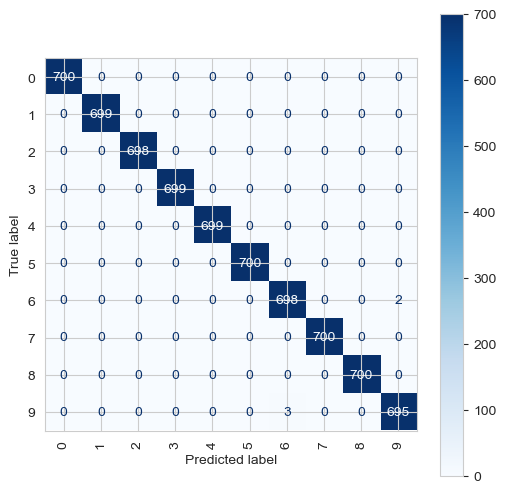

In [33]:
# Performance metrics
predictProba(rf_random.best_estimator_, X_train)

In [51]:
def predictProba(clf, X, dev=False):
    y_true = y_train
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    fig, ax = plt.subplots(figsize=(6, 6))
    skm.plot_confusion_matrix(clf, X, y_true, display_labels=X.columns, cmap=plt.cm.Blues, xticks_rotation=90, ax=ax)
    plt.show()
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

## XGB Model HP Tuning

In [52]:
xgb_model = XGBClassifier(n_estimators=100, random_state=seed)

xgb_params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [53]:
# Use the random grid to search for best hyperparameters
xgb_random = skms.RandomizedSearchCV(estimator = xgb_model, param_distributions=xgb_params, n_iter=20, cv = 3, verbose=2, n_jobs = -1, random_state=seed, scoring='f1_weighted', return_train_score=True)
# Fit the random search model
xgb_random.fit(X_train_rfe, y_train)

NameError: name 'X_train_rfe' is not defined

In [41]:
# best xgb_random model 
print(xgb_random.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8809980488377586, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.036002311696922085, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.13856085510393606, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=124, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


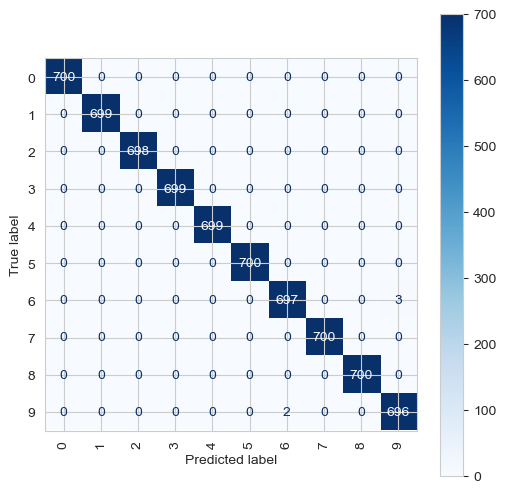

In [43]:
# Performance metrics
predictProba(xgb_random.best_estimator_, X_train)

# Model Evaluation

In [45]:
y_pred_X = rf_random.best_estimator_.predict(X_test[X_train.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("RF Test Accuracy -",skm.accuracy_score(y_test, y_pred_X)*100)

              precision    recall  f1-score   support

           0      0.874     0.882     0.878       102
           1      0.899     0.970     0.933       101
           2      0.810     0.794     0.802       102
           3      0.892     0.814     0.851       102
           4      0.897     0.853     0.874       102
           5      0.895     0.922     0.908       102
           6      0.900     0.971     0.934       102
           7      0.877     0.912     0.894       102
           8      0.876     0.902     0.889       102
           9      0.813     0.725     0.767       102

    accuracy                          0.874      1019
   macro avg      0.873     0.874     0.873      1019
weighted avg      0.873     0.874     0.873      1019

RF Test Accuracy - 87.43866535819431


In [48]:
y_pred_X = rf_random.best_estimator_.predict(X_test[X_train.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("RF Test Accuracy -",skm.accuracy_score(y_test, y_pred_X)*100)

              precision    recall  f1-score   support

           0      0.874     0.882     0.878       102
           1      0.899     0.970     0.933       101
           2      0.810     0.794     0.802       102
           3      0.892     0.814     0.851       102
           4      0.897     0.853     0.874       102
           5      0.895     0.922     0.908       102
           6      0.900     0.971     0.934       102
           7      0.877     0.912     0.894       102
           8      0.876     0.902     0.889       102
           9      0.813     0.725     0.767       102

    accuracy                          0.874      1019
   macro avg      0.873     0.874     0.873      1019
weighted avg      0.873     0.874     0.873      1019

RF Test Accuracy - 87.43866535819431


In [ ]:
y_pred_X = xgb_random.best_estimator_.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_XGB, digits=3))
print("XGB Test Accuracy -",skm.accuracy_score(y_test, y_pred_XGB)*100)

In [ ]:
print("RF Test Accuracy -",skm.accuracy_score(y_test, y_pred_X)*100)
print("XGB Test Accuracy -",skm.accuracy_score(y_test, y_pred_X)*100)
print("CatBoost Test Accuracy -",skm.accuracy_score(y_test, y_pred_X)*100)

In [ ]:
y_pred_X = cbc.predict(X_test[X_train.columns])
print(skm.classification_report(y_test, y_pred_CB, digits=3))
print("CatBoost Test Accuracy -",skm.accuracy_score(y_test, y_pred_CB)*100)

In [ ]:
from tabulate import tabulate

accuracy_scores = [
    ["Random Forest", skm.accuracy_score(y_test, y_pred_RF) * 100],
    ["XGBoost", skm.accuracy_score(y_test, y_pred_XGB) * 100],
    ["CatBoost", skm.accuracy_score(y_test, y_pred_CB) * 100]
]

table = tabulate(accuracy_scores, headers=["Model", "Test Accuracy (%)"], tablefmt="fancy_grid")
print(table)

CatBoost

In [ ]:
perm = PermutationImportance(cbc, random_state=seed).fit(X_train, y_train, n_iter=10)
print("Feature Importances using Permutation Importance")
eli5.show_weights(perm, feature_names = X_dev.columns.tolist())

`Here, we had CatBoost as the best model among all ensemble techniques without any HP tuning on the same.`

# Deep Laerning 

In [ ]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [ ]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

In [ ]:
print(model.summary()) # show summary of model

In [ ]:
# compile model  
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit model - training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=128)

In [ ]:
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
print("Accuracy:",accuracy) # print accuracy

With Deep Learning we achevied an **Accuracy of 92.84%**.

In [ ]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()